In [6]:
import os

# Define dataset paths
dataset_path = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/new_dataset/split_data"
splits = ["train", "test", "val"]

# Count images in each split
for split in splits:
    image_folder = os.path.join(dataset_path, "images", split)
    num_images = len([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
    print(f"Number of images in {split}: {num_images}")

Number of images in train: 4359
Number of images in test: 935
Number of images in val: 934


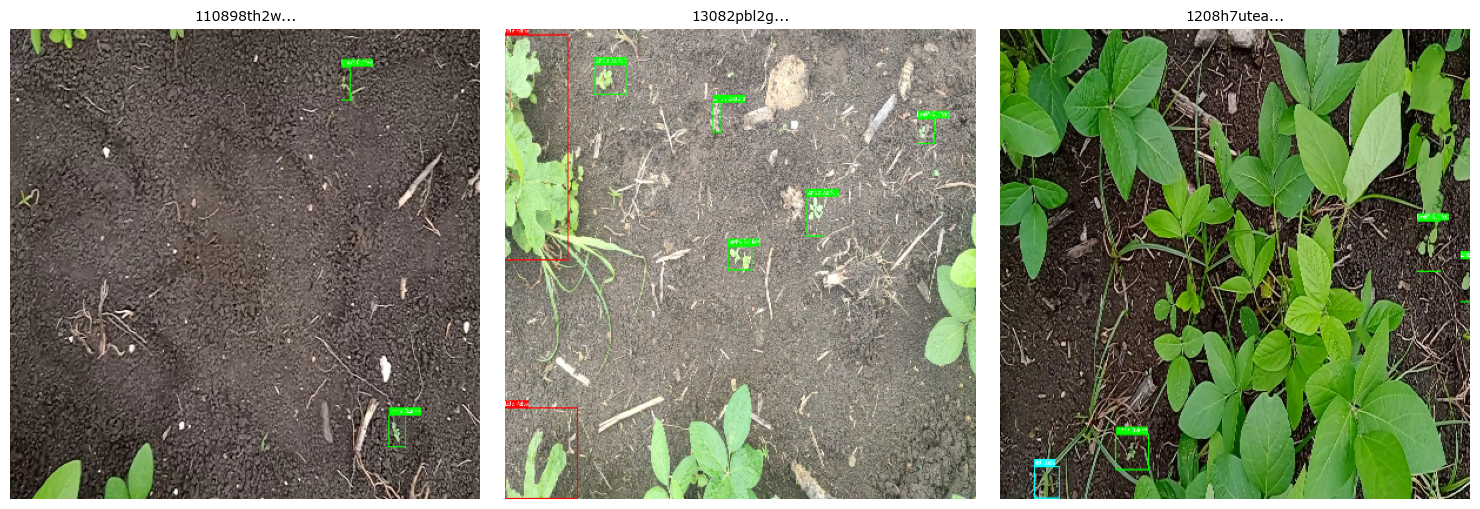

In [7]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

# Configuration - UPDATE THIS PATH
base_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/new_dataset/split_data"
class_names = {
    0: "Kena", 1: "Lamb's Quarters",
    2: "Little Mallow", 3: "Moti Dudhi", 4: "Bilayat", 5: "Choti Dudhi",
    6: "Gajar Gavat", 7: "Dwarf Cassia"
}

# Predefined colors for better visibility
def get_color(class_id):
    colors = [
        (255, 0, 0),    # Red
        (0, 255, 0),    # Green
        (0, 0, 255),    # Blue
        (255, 255, 0),  # Yellow
        (255, 128, 0),  # Orange
        (128, 0, 255),  # Purple
        (128, 128, 0),  # Olive
        (255, 192, 203) # Pink
    ]
    return colors[class_id % len(colors)]

def visualize_annotations(image_path, label_path):
    """Visualize bounding boxes with class labels"""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    
    h, w = image.shape[:2]
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())
                    class_id = int(class_id)
                    
                    # Convert coordinates
                    x1 = int((x_center - width/2) * w)
                    y1 = int((y_center - height/2) * h)
                    x2 = int((x_center + width/2) * w)
                    y2 = int((y_center + height/2) * h)
                    
                    # Draw bounding box
                    color = get_color(class_id)
                    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                    
                    # Draw class label
                    label = class_names.get(class_id, f"Class {class_id}")
                    (text_w, text_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                    cv2.rectangle(image, (x1, y1 - text_h - 5), (x1 + text_w, y1), color, -1)
                    cv2.putText(image, label, (x1, y1 - 5), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    # Resize and convert color
    image = cv2.resize(image, (400, 400))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Select and display exactly 3 images
image_folder = os.path.join(base_dir, "images", "train")
label_folder = os.path.join(base_dir, "labels", "train")
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Check if we have enough images
if len(image_files) < 3:
    print(f"Warning: Only {len(image_files)} images found. Need at least 3.")
    if len(image_files) == 0:
        raise ValueError("No images found in the directory!")
    # Show whatever we have (1 or 2 images)
    sample_images = image_files
else:
    sample_images = random.sample(image_files, 3)

# Create figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, img_name in enumerate(sample_images):
    base_name = os.path.splitext(img_name)[0]
    img_path = os.path.join(image_folder, img_name)
    label_path = os.path.join(label_folder, f"{base_name}.txt")
    
    annotated_img = visualize_annotations(img_path, label_path)
    if annotated_img is not None:
        axes[i].imshow(annotated_img)
    else:
        # Fallback to showing original image
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(cv2.resize(img, (400, 400)), cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].set_title("No Annotations", color='red')
    
    axes[i].axis('off')
    short_name = os.path.basename(img_name)[:10] + ("..." if len(img_name) > 10 else "")
    axes[i].set_title(short_name, fontsize=10)

# Remove empty subplots if showing less than 3 images
for i in range(len(sample_images), 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Yolov8n

In [8]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  
model.train(data="data.yaml", epochs=100, imgsz=832, batch=8)

New https://pypi.org/project/ultralytics/8.3.135 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.105  Python-3.8.20 torch-2.1.0+cu121 CUDA:0 (Quadro T1000, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=832, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

train: Scanning G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\split_data\labels\train... 4359 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4359/4359 [00:08<00:00, 521.63it/s]


train: New cache created: G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\split_data\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


c:\miniconda3\envs\yolo_env\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.6 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\split_data\labels\val... 934 images, 0 backgrounds, 0 corrupt: 100%|██████████| 934/934 [00:03<00:00, 261.54it/s]


val: New cache created: G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\split_data\labels\val.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 832 train, 832 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.38G      2.077      2.843      1.413         67        832: 100%|██████████| 545/545 [05:12<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:19<00:00,  3.05it/s]


                   all        934       5328      0.463      0.255      0.236      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       3.4G      1.944      2.165      1.341         63        832: 100%|██████████| 545/545 [05:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.93it/s]


                   all        934       5328      0.526      0.317       0.28      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.4G      1.942      1.965      1.348         61        832: 100%|██████████| 545/545 [04:58<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.29it/s]


                   all        934       5328      0.461      0.366      0.352      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       3.4G      1.928       1.86      1.344         68        832: 100%|██████████| 545/545 [05:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.41it/s]


                   all        934       5328       0.45      0.418      0.388       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       3.4G      1.908      1.785      1.338         77        832: 100%|██████████| 545/545 [04:58<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.76it/s]


                   all        934       5328      0.499      0.446      0.435      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.4G      1.907      1.721      1.344         34        832: 100%|██████████| 545/545 [04:53<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]


                   all        934       5328      0.538      0.474      0.469      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       3.4G      1.905      1.709      1.342         76        832: 100%|██████████| 545/545 [04:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.54it/s]


                   all        934       5328      0.476      0.491      0.467      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.4G      1.887      1.645      1.333         73        832: 100%|██████████| 545/545 [05:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:19<00:00,  2.95it/s]


                   all        934       5328      0.596      0.503      0.538      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       3.4G      1.878      1.611      1.324         63        832: 100%|██████████| 545/545 [04:57<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.83it/s]


                   all        934       5328      0.575      0.506      0.512      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       3.4G      1.871      1.617      1.329         69        832: 100%|██████████| 545/545 [04:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.64it/s]


                   all        934       5328      0.591      0.534      0.559      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.4G       1.87      1.589      1.321         36        832: 100%|██████████| 545/545 [05:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.58it/s]


                   all        934       5328      0.633      0.496      0.554      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.4G       1.86      1.562      1.315         53        832: 100%|██████████| 545/545 [05:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.44it/s]


                   all        934       5328      0.622      0.554      0.584      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.4G      1.856      1.539      1.322         83        832: 100%|██████████| 545/545 [05:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.52it/s]


                   all        934       5328      0.656      0.532      0.578      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       3.4G      1.847      1.517      1.313         65        832: 100%|██████████| 545/545 [05:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.38it/s]


                   all        934       5328      0.665      0.498      0.552       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.4G      1.846      1.502      1.311        149        832: 100%|██████████| 545/545 [05:39<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.20it/s]


                   all        934       5328      0.621      0.569      0.609      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       3.4G      1.827      1.484      1.298         37        832: 100%|██████████| 545/545 [05:29<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:19<00:00,  3.07it/s]


                   all        934       5328      0.612      0.581      0.623      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.4G      1.837      1.478      1.302         71        832: 100%|██████████| 545/545 [05:39<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.19it/s]


                   all        934       5328      0.637      0.592      0.638      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       3.4G      1.833      1.443      1.298        107        832: 100%|██████████| 545/545 [05:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.42it/s]


                   all        934       5328      0.768      0.556      0.645      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.4G      1.827      1.444      1.297         54        832: 100%|██████████| 545/545 [05:22<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.60it/s]


                   all        934       5328      0.677      0.562      0.632      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.4G      1.825      1.439      1.295         73        832: 100%|██████████| 545/545 [05:21<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.35it/s]


                   all        934       5328      0.675      0.587      0.668      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       3.4G      1.822      1.428      1.297         79        832: 100%|██████████| 545/545 [05:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.27it/s]


                   all        934       5328      0.668      0.587      0.653       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       3.4G      1.815      1.401      1.285        125        832: 100%|██████████| 545/545 [05:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.65it/s]


                   all        934       5328       0.71      0.592      0.665       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.4G      1.819      1.396       1.29         79        832: 100%|██████████| 545/545 [05:21<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.34it/s]


                   all        934       5328       0.67      0.634      0.676      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.4G      1.798      1.371      1.283         62        832: 100%|██████████| 545/545 [05:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.23it/s]


                   all        934       5328      0.679      0.592      0.664      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.4G      1.803      1.365      1.286         49        832: 100%|██████████| 545/545 [05:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.50it/s]


                   all        934       5328      0.669      0.659      0.693      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       3.4G      1.799      1.357      1.281         58        832: 100%|██████████| 545/545 [05:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.45it/s]


                   all        934       5328      0.733      0.638      0.695      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.4G      1.799      1.343      1.279         95        832: 100%|██████████| 545/545 [05:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [47:09<00:00, 47.96s/it]   


                   all        934       5328      0.742      0.651      0.724      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.4G      1.792      1.338      1.286         45        832: 100%|██████████| 545/545 [05:57<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]


                   all        934       5328       0.71      0.637      0.708      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       3.4G      1.797      1.334       1.28         70        832: 100%|██████████| 545/545 [05:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.42it/s]


                   all        934       5328      0.741      0.614      0.687       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       3.4G      1.782      1.314       1.27         59        832: 100%|██████████| 545/545 [05:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.42it/s]


                   all        934       5328      0.715      0.672      0.729      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.4G      1.785      1.296      1.273         95        832: 100%|██████████| 545/545 [05:13<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.72it/s]


                   all        934       5328      0.756      0.637      0.714       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.4G      1.783      1.285      1.277         76        832: 100%|██████████| 545/545 [05:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]

                   all        934       5328      0.716       0.66      0.721      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.4G       1.77      1.281      1.265         54        832: 100%|██████████| 545/545 [04:58<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.82it/s]


                   all        934       5328      0.742      0.685      0.732      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.4G      1.772      1.268      1.265         93        832: 100%|██████████| 545/545 [05:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.43it/s]


                   all        934       5328      0.735      0.662      0.729      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       3.4G      1.765      1.257      1.265         60        832: 100%|██████████| 545/545 [05:31<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:19<00:00,  3.05it/s]


                   all        934       5328      0.718      0.652      0.708      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.4G      1.756      1.253      1.262         52        832: 100%|██████████| 545/545 [05:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.70it/s]

                   all        934       5328       0.76      0.643      0.733      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       3.4G      1.758      1.243      1.264         67        832: 100%|██████████| 545/545 [05:26<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.71it/s]


                   all        934       5328      0.726      0.689      0.727      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.4G      1.755      1.236       1.26         65        832: 100%|██████████| 545/545 [05:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.67it/s]


                   all        934       5328      0.756      0.662      0.734      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.4G      1.752       1.22      1.256         86        832: 100%|██████████| 545/545 [05:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.70it/s]


                   all        934       5328      0.785      0.701       0.76      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.4G      1.758      1.228      1.259         64        832: 100%|██████████| 545/545 [05:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.77it/s]

                   all        934       5328      0.796      0.689      0.763       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.4G      1.746      1.208       1.26         78        832: 100%|██████████| 545/545 [05:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.72it/s]


                   all        934       5328      0.777      0.665      0.742      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       3.4G      1.748      1.209      1.256         75        832: 100%|██████████| 545/545 [05:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.74it/s]


                   all        934       5328      0.765      0.675      0.756      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.4G      1.734      1.189      1.247         97        832: 100%|██████████| 545/545 [05:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.50it/s]


                   all        934       5328      0.773      0.701      0.755      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       3.4G      1.735      1.186      1.249         74        832: 100%|██████████| 545/545 [05:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.56it/s]


                   all        934       5328      0.787      0.688      0.755      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.4G      1.736      1.178      1.252         89        832: 100%|██████████| 545/545 [05:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.49it/s]

                   all        934       5328      0.778      0.678      0.751      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.4G      1.733      1.177      1.244         63        832: 100%|██████████| 545/545 [05:25<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.77it/s]

                   all        934       5328       0.75      0.721      0.767      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.4G      1.728      1.171      1.254         54        832: 100%|██████████| 545/545 [04:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]

                   all        934       5328      0.774      0.719      0.772      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.4G      1.718      1.161      1.238         53        832: 100%|██████████| 545/545 [04:58<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]

                   all        934       5328      0.791      0.707      0.768      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.4G      1.718      1.156      1.241         82        832: 100%|██████████| 545/545 [04:58<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.80it/s]

                   all        934       5328       0.74      0.705      0.759      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       3.4G      1.711      1.134      1.237         71        832: 100%|██████████| 545/545 [05:17<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.74it/s]

                   all        934       5328      0.785      0.708       0.77      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.4G      1.724      1.143      1.241         58        832: 100%|██████████| 545/545 [05:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.78it/s]

                   all        934       5328      0.786      0.723      0.774      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.4G       1.71      1.141      1.235         60        832: 100%|██████████| 545/545 [05:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.77it/s]

                   all        934       5328      0.801      0.692      0.775       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.4G      1.711      1.119       1.23         42        832:  35%|███▌      | 192/545 [01:53<03:28,  1.69it/s]


error: Caught error in DataLoader worker process 4.
Original Traceback (most recent call last):
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\ultralytics\data\base.py", line 368, in __getitem__
    return self.transforms(self.get_image_and_label(index))
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\ultralytics\data\base.py", line 382, in get_image_and_label
    label["img"], label["ori_shape"], label["resized_shape"] = self.load_image(index)
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\ultralytics\data\base.py", line 227, in load_image
    im = cv2.imread(f)  # BGR
  File "c:\miniconda3\envs\yolo_env\lib\site-packages\ultralytics\utils\patches.py", line 30, in imread
    return cv2.imdecode(np.fromfile(filename, np.uint8), flags)
cv2.error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 6220800 bytes in function 'cv::OutOfMemoryError'



In [2]:
from ultralytics import YOLO
# Load the last saved model weights (usually 'last.pt')
model_path = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/runs/detect/train/weights/last.pt"
model = YOLO(model_path)

# Resume training
model.train( data="data.yaml", epochs=50, imgsz=832, batch=8, resume=True )

New https://pypi.org/project/ultralytics/8.3.135 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.105  Python-3.8.20 torch-2.1.0+cu121 CUDA:0 (Quadro T1000, 4096MiB)
engine\trainer: task=detect, mode=train, model=G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\runs\detect\train\weights\last.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=832, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\runs\detect\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, st

train: Scanning G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\split_data\labels\train.cache... 4359 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4359/4359 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


c:\miniconda3\envs\yolo_env\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.6 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\split_data\labels\val.cache... 934 images, 0 backgrounds, 0 corrupt: 100%|██████████| 934/934 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\runs\detect\train\weights\last.pt from epoch 53 to 100 total epochs
TensorBoard: model graph visualization added 
Image sizes 832 train, 832 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.38G      1.714      1.129      1.235         67        832: 100%|██████████| 545/545 [10:29<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.34it/s]


                   all        934       5328      0.766      0.706      0.771      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.38G      1.703      1.124      1.233         63        832: 100%|██████████| 545/545 [10:44<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.29it/s]


                   all        934       5328      0.778      0.729      0.775       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.39G      1.706      1.109      1.233         61        832: 100%|██████████| 545/545 [09:57<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]

                   all        934       5328      0.804      0.699      0.776      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.39G        1.7      1.103       1.23         68        832: 100%|██████████| 545/545 [09:51<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:19<00:00,  3.08it/s]


                   all        934       5328      0.788      0.714      0.778      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.39G      1.686      1.091      1.226         77        832: 100%|██████████| 545/545 [10:56<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.14it/s]


                   all        934       5328      0.775      0.731      0.775      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.39G      1.691      1.086      1.226         34        832: 100%|██████████| 545/545 [10:36<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.56it/s]

                   all        934       5328       0.79      0.729      0.773      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.39G      1.692      1.091      1.228         76        832: 100%|██████████| 545/545 [10:17<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.33it/s]


                   all        934       5328      0.783      0.723      0.779       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.39G      1.685      1.071      1.223         73        832: 100%|██████████| 545/545 [10:03<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.46it/s]


                   all        934       5328      0.808       0.71       0.78      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.39G      1.682      1.067      1.217         63        832: 100%|██████████| 545/545 [09:36<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.76it/s]


                   all        934       5328      0.792      0.726      0.779      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.39G      1.679      1.068      1.222         69        832: 100%|██████████| 545/545 [09:02<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.81it/s]

                   all        934       5328      0.785      0.731      0.774      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.39G      1.679      1.063      1.219         36        832: 100%|██████████| 545/545 [09:02<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.91it/s]

                   all        934       5328      0.779      0.729      0.776      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.39G      1.671      1.054      1.211         53        832: 100%|██████████| 545/545 [08:59<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.91it/s]

                   all        934       5328      0.783      0.729      0.777      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.39G      1.662      1.042      1.213         83        832: 100%|██████████| 545/545 [09:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.80it/s]

                   all        934       5328      0.783      0.733      0.782      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.39G      1.664      1.042      1.214         65        832: 100%|██████████| 545/545 [09:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]

                   all        934       5328      0.772      0.756      0.784      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.39G      1.664      1.038      1.212        149        832: 100%|██████████| 545/545 [09:02<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.79it/s]

                   all        934       5328      0.797      0.727      0.794       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.39G      1.652       1.03      1.203         37        832: 100%|██████████| 545/545 [09:02<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]

                   all        934       5328      0.779      0.757      0.791      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.39G      1.659      1.024      1.207         71        832: 100%|██████████| 545/545 [09:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]


                   all        934       5328      0.752      0.768      0.786      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.39G      1.651      1.017      1.202        107        832: 100%|██████████| 545/545 [09:04<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]

                   all        934       5328      0.813      0.729       0.79      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.39G      1.649      1.018      1.203         54        832: 100%|██████████| 545/545 [10:07<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.25it/s]


                   all        934       5328      0.819      0.719      0.785      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.39G       1.65      1.017      1.203         73        832: 100%|██████████| 545/545 [11:10<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.16it/s]


                   all        934       5328      0.798      0.751      0.788      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.39G      1.643      1.012      1.201         79        832: 100%|██████████| 545/545 [10:45<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:18<00:00,  3.25it/s]


                   all        934       5328      0.809      0.731      0.791      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.39G      1.641          1      1.195        125        832: 100%|██████████| 545/545 [9:50:16<00:00, 64.98s/it]      
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.36it/s]


                   all        934       5328        0.8      0.725       0.79      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.39G      1.645     0.9998      1.198         79        832: 100%|██████████| 545/545 [09:19<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.75it/s]

                   all        934       5328       0.81      0.737      0.797      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.39G      1.629     0.9848      1.195         62        832: 100%|██████████| 545/545 [09:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]

                   all        934       5328      0.792      0.755      0.796      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.39G      1.628     0.9902      1.196         49        832: 100%|██████████| 545/545 [09:02<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]

                   all        934       5328      0.807      0.741      0.792      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.39G      1.624     0.9767      1.192         58        832: 100%|██████████| 545/545 [09:03<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:14<00:00,  3.96it/s]

                   all        934       5328      0.783      0.746      0.787       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.39G      1.626      0.975       1.19         95        832: 100%|██████████| 545/545 [09:04<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]

                   all        934       5328      0.828      0.727      0.799      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.39G      1.616     0.9749      1.192         45        832: 100%|██████████| 545/545 [09:10<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.75it/s]


                   all        934       5328      0.794       0.75      0.795      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.39G      1.626     0.9745      1.194         70        832: 100%|██████████| 545/545 [09:26<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.70it/s]


                   all        934       5328      0.814      0.746      0.795      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.39G      1.608     0.9587      1.182         59        832: 100%|██████████| 545/545 [09:25<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.79it/s]

                   all        934       5328      0.809      0.732      0.786       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.39G      1.614      0.955      1.185         95        832: 100%|██████████| 545/545 [09:19<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.83it/s]

                   all        934       5328      0.795       0.76      0.797       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.39G      1.608       0.95      1.187         76        832: 100%|██████████| 545/545 [09:02<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.93it/s]

                   all        934       5328      0.801      0.746      0.797      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.39G      1.601     0.9512      1.178         54        832: 100%|██████████| 545/545 [09:03<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]

                   all        934       5328      0.786      0.755      0.791      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.39G      1.604       0.94      1.179         93        832: 100%|██████████| 545/545 [09:07<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]

                   all        934       5328      0.837      0.728      0.794      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.39G      1.597     0.9352      1.179         60        832: 100%|██████████| 545/545 [09:12<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.78it/s]

                   all        934       5328      0.827       0.74      0.795      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.39G      1.586     0.9308      1.176         52        832: 100%|██████████| 545/545 [09:13<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.82it/s]

                   all        934       5328      0.818      0.741      0.794      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.39G       1.59     0.9316      1.178         67        832: 100%|██████████| 545/545 [09:13<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.74it/s]

                   all        934       5328      0.825       0.75      0.798      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.39G      1.588     0.9271      1.176         65        832: 100%|██████████| 545/545 [09:14<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.37it/s]


                   all        934       5328      0.825      0.744      0.793      0.386
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.39G      1.613     0.9227      1.198         22        832: 100%|██████████| 545/545 [09:34<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.45it/s]


                   all        934       5328      0.818      0.732      0.784      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.39G      1.597     0.9038      1.193         45        832: 100%|██████████| 545/545 [09:29<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.83it/s]

                   all        934       5328      0.804      0.745      0.793      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.39G      1.584      0.886       1.19         35        832: 100%|██████████| 545/545 [08:54<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]

                   all        934       5328      0.813      0.755      0.799      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.39G      1.582     0.8783      1.184         26        832: 100%|██████████| 545/545 [08:57<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]

                   all        934       5328      0.805      0.757      0.799      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.39G       1.58     0.8699      1.186         51        832: 100%|██████████| 545/545 [08:58<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.78it/s]


                   all        934       5328      0.817      0.749      0.797      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.39G      1.574     0.8767      1.183         32        832: 100%|██████████| 545/545 [09:39<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.91it/s]

                   all        934       5328       0.82      0.745      0.796      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.39G      1.578      0.872      1.187         48        832: 100%|██████████| 545/545 [08:59<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]

                   all        934       5328      0.819      0.758        0.8      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.39G      1.574      0.862      1.185         35        832: 100%|██████████| 545/545 [08:55<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.76it/s]

                   all        934       5328      0.812      0.759      0.801      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.39G      1.566      0.858      1.179         55        832: 100%|██████████| 545/545 [08:57<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]

                   all        934       5328      0.825      0.747        0.8      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.39G      1.572     0.8601      1.184         32        832: 100%|██████████| 545/545 [11:01<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:16<00:00,  3.62it/s]

                   all        934       5328      0.834      0.746      0.803      0.386



48 epochs completed in 17.527 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.105  Python-3.8.20 torch-2.1.0+cu121 CUDA:0 (Quadro T1000, 4096MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:17<00:00,  3.28it/s]


                   all        934       5328      0.794      0.728      0.794       0.39
                  Kena        494        940      0.747      0.744      0.781       0.42
       Lamb's Quarters        827       3475      0.783      0.616      0.739      0.306
         Little Mallow        201        325       0.76      0.828      0.853      0.559
            Moti Dudhi        154        306      0.739      0.713      0.728       0.37
               Bilayat         27         29      0.822      0.724       0.81      0.327
           Choti Dudhi         98        129      0.788      0.628      0.742       0.32
           Gajar Gavat         45         75      0.757       0.72      0.797      0.388
          Dwarf Cassia         42         49      0.954      0.854      0.899       0.43
Speed: 0.6ms preprocess, 8.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000028BE5AB3E80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047